# Interactive parallel computing with ipyparallel

ipyparallel is a Python package and collection of scripts for controlling clusters for Jupyter.

ipyparallel contains the following scripts:

- ipcluster - start/stop a cluster
- ipcontroller - start a scheduler
- ipengine - start an engine


## Installing/activating ipyparallel

- first install the package: `conda install ipyparallel`
- to be able to launch parallel engines from the dashboard add `c.NotebookApp.server_extensions.append('ipyparallel.nbextension')` to the file `~/.jupyter/jupyter_notebook_config.py` (may need to create it)
- then enable the IPython Clusters tab in Jupyter by typing `ipcluster nbextension enable --user` in a terminal


### *Exercise*:
- Install and activate ipyparallel!

## How does it work?

- Launch IPython **engines** (Independent Python processes. Typically one per core)
- Create a `Client` that acts as a proxy to the engines
- Use client to launch tasks on the engines

### There are several ways to run parallel code

- **Direct interface** - access engines directly, explicitly through their identifiers
- **load-balanced interface** - submit job to scheduler which distributes to engines depending on load

### Demo, direct interface

In [1]:
import numpy as np

In [2]:
from ipyparallel import Client

In [3]:
rc = Client()

/Users/ktw/anaconda2/lib/python2.7/site-packages/ipyparallel/client/client.py:442: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@192.168.0.10')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


The `ids` attribute of Client instance shows identifiers of engines that IPython detected

In [4]:
rc.ids

[0, 1, 2, 3]

### *Exercise*:
- what other attributes does rc have?


### Demo

Use the %px (or %%px) magic to execute given python code in parallel

In [18]:
%px?

In [6]:
%px import os, time

In [7]:
%px a = os.getpid()

In [8]:
%px print(os.getpid())

[stdout:0] 15285
[stdout:1] 15284
[stdout:2] 15283
[stdout:3] 15286


Specify list of engines to run code on using `--targets`. Supports Python slicing

In [9]:
%%px --targets :-1
    print(os.getpid())

[stdout:0] 15285
[stdout:1] 15284
[stdout:2] 15283


Import module and connect to engines

In [10]:
import ipyparallel

In [11]:
clients = ipyparallel.Client()
clients.ids

[0, 1, 2, 3]

In [19]:
dview = clients[:]
#dview = clients.direct_view()
dview

### *Exercise: Estimating $\pi$ with parallel Monte Carlo* 

Let us first make a plot to illustrate what we want to do

In [13]:
%matplotlib inline

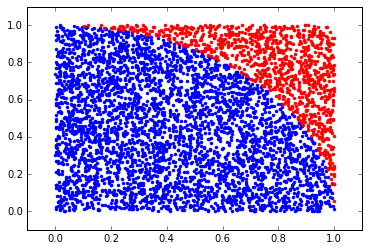

In [14]:
import matplotlib.pylab as plt
import numpy as np

n = 5000
p = np.random.rand(n,2)
idx = np.sqrt(p[:,0]**2+p[:,1]**2) < 1
plt.plot(p[idx,0],p[idx,1],'b.') # point inside
plt.plot(p[idx==False,0],p[idx==False,1],'r.') # point outside
plt.axis([-0.1,1.1,-0.1,1.1]) 
plt.show()

### Task

 - take the following function mc_pi
 - run it in serial using 10$^6$ random points, and time it
 - run it in parallel using the map_sync method of clients
 - time it, and compare with serial execution

In [17]:
import numpy as np
def mc_pi(n):
    count = 0
    p = np.random.rand(n,2)
    for i in range(n):
        x = p[i,0]
        y = p[i,1]
        if (x**2 + y**2) <= 1.0:
            count += 1
    return float(count)/float(n)